In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('listings_detaille.csv')
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,56766,https://www.airbnb.com/rooms/56766,20241214051454,2024-12-14,city scrape,"Duplex avec vue, centre ville",Beautifull duplex terrace on Lyon's roofs ! Co...,"the general atmosphere, the magnificent archit...",https://a0.muscache.com/pictures/26675020/4940...,269557,...,4.88,4.86,4.61,"Available with a mobility lease only (""bail mo...",f,1,1,0,0,0.33
1,77104,https://www.airbnb.com/rooms/77104,20241214051454,2024-12-14,city scrape,Nice Flat in the center of Lyon,NaN,NaN,https://a0.muscache.com/pictures/518769/186679...,411285,...,5.00,4.88,4.84,6938113058353,f,1,1,0,0,0.15
2,134539,https://www.airbnb.com/rooms/134539,20241214051454,2024-12-14,city scrape,"Centre of old town,home sweet home",Ideal situation and cosy..In the center of the...,It's more than charming!<br />It's the most be...,https://a0.muscache.com/pictures/miso/Hosting-...,660135,...,4.61,4.86,4.44,6938513221658,f,1,1,0,0,0.82
3,137132,https://www.airbnb.com/rooms/137132,20241214051454,2024-12-14,city scrape,"Bel apartment, 2 rooms, Lyon center","- Nice 2 rooms apartment, on the 6th and last ...",Four very nice: residential but with lots of r...,https://a0.muscache.com/pictures/1085252/2e9ae...,670404,...,4.84,4.95,4.53,0693861800177,f,1,1,0,0,0.12
4,174304,https://www.airbnb.com/rooms/174304,20241214051454,2024-12-14,city scrape,Quartier Terreaux 4/6 pers. Hyper centre / Clim,"In a typical Lyonnais building, this beautiful...",A prime location in the center of the city of ...,https://a0.muscache.com/pictures/2c68bbca-08dd...,832917,...,4.86,4.88,4.55,6938112368465,f,2,2,0,0,2.99


In [3]:
#efface colonnes: 

df = df.drop(columns=["host_neighbourhood", 
                      "host_listings_count", 
                      "host_verifications", 
                      "host_has_profile_pic",
                      "listing_url", 
                      "host_name",
                      "scrape_id", 
                      "last_scraped", 
                      "source", 
                      "name", 
                      "description", 
                      "neighborhood_overview", 
                      "picture_url", 
                      "host_url", 
                      "host_about", 
                      "host_response_time", 
                      "host_thumbnail_url", 
                      "host_picture_url", 
                      "neighbourhood", 
                      "neighbourhood_group_cleansed", 
                      "bathrooms", 
                      "bathrooms_text", 
                      "amenities", 
                      "minimum_minimum_nights", 
                      "maximum_minimum_nights", 
                      "minimum_maximum_nights", 
                      "maximum_maximum_nights", 
                      "minimum_nights_avg_ntm", 
                      "maximum_nights_avg_ntm", 
                      "calendar_updated", 
                      "has_availability", 
                      "availability_30", 
                      "availability_60", 
                      "availability_90", 
                      "availability_365", 
                      "calendar_last_scraped", 
                      "number_of_reviews_l30d", 
                      "calculated_host_listings_count_private_rooms", 
                      "calculated_host_listings_count_shared_rooms", 
                      "calculated_host_listings_count_entire_homes"])


In [4]:
# pour la colonne licence remplacer les cases vides par 0 et tout le reste par 1
df['license'] = df['license'].fillna(0)
df['license'] = df['license'].apply(lambda x: 1 if x != 0 else 0)

# pour la colonne instant_bookable remplacer les cases t par 1 et les cases f par 0
df['instant_bookable'] = df['instant_bookable'].replace({'t': 1, 'f': 0})

# pour la colonne host_identity_verified remplacer les cases t par 1 et les cases f par 0
df['host_identity_verified'] = df['host_identity_verified'].replace({'t': 1, 'f': 0})

# pour la colonne host_is_superhost remplacer les cases t par 1 et les cases f par 0
df['host_is_superhost'] = df['host_is_superhost'].replace({'t': 1, 'f': 0})

In [5]:
#diviser host_location en 2 columnas: host_city y host_country
df['host_city'] = df['host_location'].str.split(',').str[0]
df['host_country'] = df['host_location'].str.split(',').str[1]

#effacer colonne host_location
df = df.drop(columns=['host_location'])

In [6]:
df['price'].isna().sum()/df.shape[0]*100

44.69719947426954

In [7]:
#nous avons 40 % de valeurs manquantes dans la colonne price

In [8]:

df['price'] = df['price'].replace({'\$':'', ',':''}, regex=True).astype(float)

In [9]:
#EFFACE VAL NULL

In [10]:
#null in host_identity_verified
df['host_identity_verified'].isnull().sum()
#efface null values
df = df.dropna(subset=['host_identity_verified'])

In [11]:
#changer val a bool
# cambiar a bool host_identity_verified
df['host_identity_verified'] = df['host_identity_verified'].astype(bool)

In [12]:
#pourcentage de host_identity not verifiedn et price null
# pas de verification didentite et price null
df[(df['host_identity_verified'] == False) & (df['price'].isnull())].shape[0]/df.shape[0]*100

10.011123470522804

In [13]:
#pourcentage de first_review null  et price null
# pas de premier commentaire et pas de prix
df[(df['first_review'].isnull()) & (df['price'].isnull())].shape[0]/df.shape[0]*100

12.498735969258773

In [14]:
#pourcentage de licence egal a vide et price null
#pas de licence pas de price
df[(df['license'] == 0) & (df['price'].isnull())].shape[0]/df.shape[0]*100

29.62888057437557

In [15]:
# pas de licence, pas de prix, pas de premier commentaire et pas de verification didentite
df[(df['license'] == 0) & (df['price'].isnull()) & (df['first_review'].isnull()) & (df['host_identity_verified'] == False)].shape[0]/df.shape[0]*100

4.226918798665183

In [16]:
# onefface
effacer = df[(df['license'] == 0) & 
             (df['price'].isnull()) & 
             (df['first_review'].isnull()) & 
             (df['host_identity_verified'] == False)]
df = df.drop(index=effacer.index)


In [17]:
# ver tipo de variable host_is_superhost, licence y host_identity_verified
df['host_is_superhost'].dtype, df['license'].dtype, df['host_identity_verified'].dtype

(dtype('float64'), dtype('int64'), dtype('bool'))

In [18]:
#tipos unicos de variables de de host_is_superhost, licence
df['host_is_superhost'].unique(), df['license'].unique(), df['host_identity_verified'].unique()

(array([ 0.,  1., nan]), array([1, 0]), array([ True, False]))

In [19]:
#remplacer nan par 0 en host_is_superhost
df['host_is_superhost'] = df['host_is_superhost'].fillna(0)

In [20]:
#cambiar variable de host_is_superhost y licence a bool
df['host_is_superhost'] = df['host_is_superhost'].astype(bool)
df['license'] = df['license'].astype(bool)

In [21]:
#contar los valores que tienen precios de 1000 en adelante, son superhost, tienen licencia
df[(df['price'] >= 1000) & (df['host_is_superhost'] == False) & (df['license'] == False)].shape[0]

6

In [22]:
effacer_2 = df[(df['price'] >= 1000) &
              (df['host_is_superhost'] == False) & 
              (df['license'] == False)]

df = df.drop(index=effacer_2.index)

In [23]:
#on affiche que les colonnes qui ont au moins 1 valeur null
df.columns[df.isnull().sum() > 0]



Index(['host_response_rate', 'host_acceptance_rate', 'bedrooms', 'beds',
       'price', 'first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'reviews_per_month',
       'host_city', 'host_country'],
      dtype='object')

In [24]:
# ver el tipo de variables estas columnas 'host_response_rate', 'host_acceptance_rate', 'bedrooms', 'beds',
    #   'first_review', 'last_review', 'review_scores_rating',
    #   'review_scores_accuracy', 'review_scores_cleanliness',
      # 'review_scores_checkin', 'review_scores_communication',
    #   'review_scores_location', 'review_scores_value', 'reviews_per_month
df['host_response_rate'].dtype, df['host_acceptance_rate'].dtype, df['first_review'].dtype, df['last_review'].dtype

(dtype('O'), dtype('O'), dtype('O'), dtype('O'))

In [25]:
# ver los tipos de datos de df['host_response_rate'].dtype, df['host_acceptance_rate'].dtype, df['first_review'].dtype, df['last_review'].dtype
df['host_response_rate'].unique(), df['host_acceptance_rate'].unique(), df['first_review'].unique(), df['last_review'].unique()

(array(['100%', '0%', nan, '50%', '67%', '90%', '99%', '88%', '20%', '87%',
        '83%', '91%', '75%', '16%', '80%', '97%', '40%', '86%', '93%',
        '70%', '63%', '89%', '78%', '25%', '81%', '33%', '94%', '96%',
        '98%', '92%', '17%', '95%', '60%', '11%', '71%', '10%', '82%',
        '58%', '85%', '13%', '30%', '57%', '9%', '69%', '44%', '61%',
        '48%', '14%', '7%', '29%', '41%', '6%', '74%', '77%', '72%', '73%'],
       dtype=object),
 array(['50%', '67%', '59%', nan, '98%', '100%', '14%', '71%', '57%', '0%',
        '96%', '97%', '99%', '94%', '77%', '76%', '91%', '83%', '56%',
        '58%', '80%', '79%', '25%', '81%', '69%', '6%', '64%', '72%',
        '86%', '85%', '95%', '20%', '27%', '62%', '11%', '29%', '21%',
        '23%', '43%', '65%', '54%', '40%', '82%', '74%', '18%', '63%',
        '88%', '60%', '93%', '89%', '78%', '9%', '90%', '75%', '33%',
        '92%', '84%', '87%', '70%', '38%', '66%', '44%', '48%', '10%',
        '17%', '47%', '41%', '55%', '42%',

In [26]:
# on remple les null de host_city y host_country par unknown
df['host_city'] = df['host_city'].fillna('unknown')
df['host_country'] = df['host_country'].fillna('unknown')

In [27]:
# pour les dates:
import pandas as pd
import numpy as np

# --- 1️⃣ Convertir host_response_rate y host_acceptance_rate ---
for col in ['host_response_rate', 'host_acceptance_rate']:
    df[col] = df[col].astype(str).str.rstrip('%')  # Eliminar '%'
    
    # Convertir a float y dejar NaN donde no se puede convertir
    df[col] = pd.to_numeric(df[col], errors='coerce') / 100



In [28]:
#linea que tiene id igual 56766 muestra su first_review y last_review
df[df['id'] == 56766][['first_review', 'last_review']]

,first_review,last_review
0,2010-11-15,2024-06-30


In [29]:
#en utilisant les knn imputer pour remplacer les valeurs manquantes et scaler les données

from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

# --- 3️⃣ Mantener el DataFrame sin crear nuevas variables categóricas ---
df_encoded = df.copy()  # Copiamos el DataFrame sin modificar su estructura

# --- 4️⃣ Selección de columnas para KNN ---
cols_knn = [
    'price', 'bedrooms', 'beds', 'accommodates', 
    'host_response_rate', 'host_acceptance_rate',
    'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
    'review_scores_checkin', 'review_scores_communication',
    'review_scores_location', 'review_scores_value', 'reviews_per_month'
]

# Asegurar que solo usamos columnas que existen en el DataFrame
cols_knn = [col for col in cols_knn if col in df_encoded.columns]

# --- 5️⃣ Escalar datos antes de la imputación ---
scaler = MinMaxScaler()
df_encoded.loc[:, cols_knn] = scaler.fit_transform(df_encoded[cols_knn])

# --- 6️⃣ Aplicar KNN Imputer ---
imputer = KNNImputer(n_neighbors=5)
df_encoded.loc[:, cols_knn] = imputer.fit_transform(df_encoded[cols_knn])

# --- 7️⃣ Desescalar datos después de la imputación ---
df_encoded.loc[:, cols_knn] = scaler.inverse_transform(df_encoded[cols_knn])

# --- 8️⃣ Reintegrar los valores imputados en el DataFrame original ---
df.loc[:, cols_knn] = df_encoded[cols_knn]


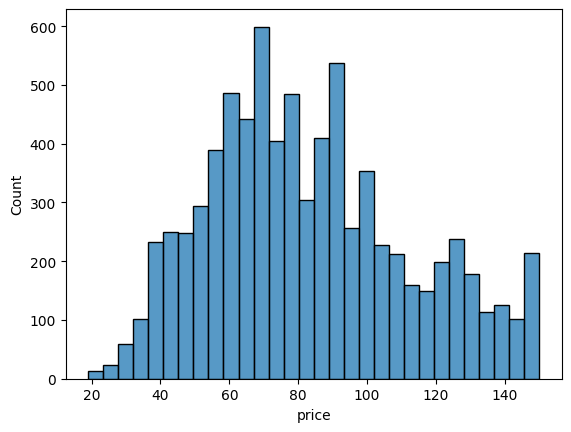

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

#apercu des distributions de prix jusqu'à 150
sns.histplot(df['price'][df['price'] <= 150], bins=30)
plt.show()

In [31]:
# head de colona price y host_identity_verified solo de los que son host_identity_verified = False
df[df['host_identity_verified'] == False][['price', 'host_identity_verified']].head()

,price,host_identity_verified
16,92.2,False
79,70.0,False
81,27.0,False
105,82.8,False
107,82.0,False


In [32]:
#nous allons utiliser knn pour imputer les valeurs manquantes de la colonne price

In [33]:
from sklearn.impute import KNNImputer

# Codification des variables catégorielles
df_encoded = pd.get_dummies(df, columns=['neighbourhood_cleansed', 'property_type', 'room_type'], drop_first=True)

# Selec col pour fair imputation
cols_knn = ['price', 'bedrooms', 'beds', 'accommodates'] + \
              [col for col in df_encoded.columns if 'neighbourhood_cleansed_' in col or 'property_type_' in col or 'room_type_' in col]


In [34]:
from sklearn.preprocessing import MinMaxScaler
# on scale les données dabord
scaler = MinMaxScaler()
df_encoded[cols_knn] = scaler.fit_transform(df_encoded[cols_knn])

In [35]:
# Modelo KNN para imputación

imputer = KNNImputer(n_neighbors=5)
df_encoded[cols_knn] = imputer.fit_transform(df_encoded[cols_knn])

# rescale
df_encoded[cols_knn] = scaler.inverse_transform(df_encoded[cols_knn])

# Actualizar columna original price con los datos imputados
df['price'] = df_encoded['price']

# Mostrar resultados
print(df[['id', 'price']].head())

       id  price
0   56766  130.0
1   77104  100.0
2  134539  185.0
3  137132   88.0
4  174304  194.0


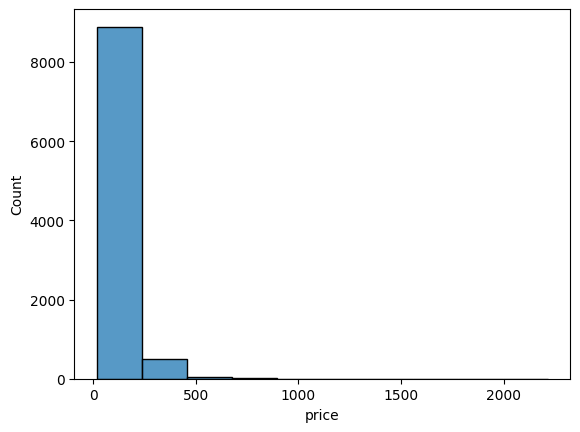

In [36]:
#ahora que remplazamos los valores nulos de la columna price, podemos ver un grafico de la distribucion de los precios
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['price'], bins=10)
plt.show()

In [37]:
# info de price
df['price'].describe()

count    9465.000000
mean      112.071696
std        92.233425
min        19.000000
25%        65.000000
50%        88.800000
75%       128.800000
max      2214.000000
Name: price, dtype: float64

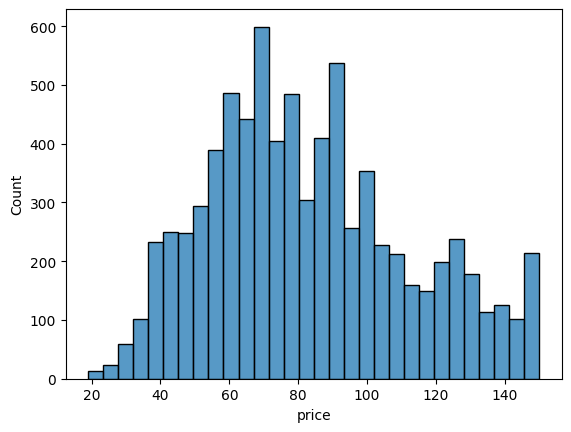

In [38]:
# muestrame como se veai lo mismo antes de la imputacion
sns.histplot(df['price'][df['price'] <= 150], bins=30)
plt.show()

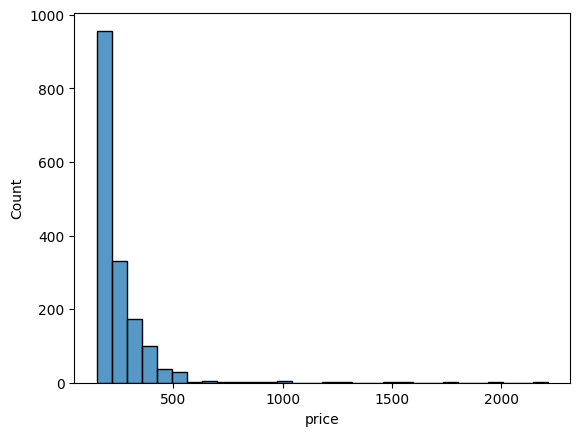

In [39]:
#ver el grafio de 150 hasta el final
sns.histplot(df['price'][df['price'] > 150], bins=30)
plt.show()

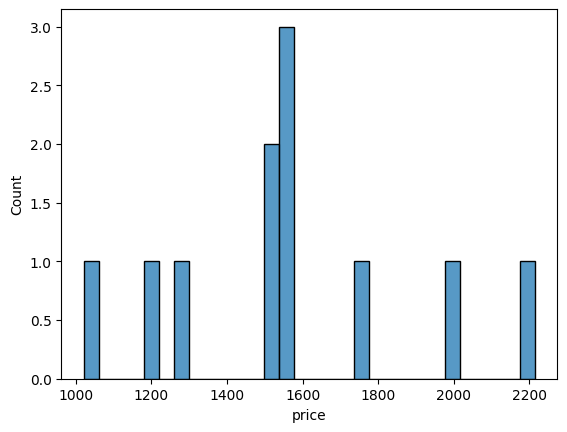

In [40]:
#ver el grafio de 1000 hasta el final
sns.histplot(df['price'][df['price'] > 1000], bins=30)
plt.show()

In [41]:

df.isna().sum()/df.shape[0]*100

id                                 0.000000
host_id                            0.000000
host_since                         0.000000
host_response_rate                 0.000000
host_acceptance_rate               0.000000
host_is_superhost                  0.000000
host_total_listings_count          0.000000
host_identity_verified             0.000000
neighbourhood_cleansed             0.000000
latitude                           0.000000
longitude                          0.000000
property_type                      0.000000
room_type                          0.000000
accommodates                       0.000000
bedrooms                           0.000000
beds                               0.000000
price                              0.000000
minimum_nights                     0.000000
maximum_nights                     0.000000
number_of_reviews                  0.000000
number_of_reviews_ltm              0.000000
first_review                      15.266772
last_review                     

In [42]:
df.isnull().sum()/df.shape[0]*100

id                                 0.000000
host_id                            0.000000
host_since                         0.000000
host_response_rate                 0.000000
host_acceptance_rate               0.000000
host_is_superhost                  0.000000
host_total_listings_count          0.000000
host_identity_verified             0.000000
neighbourhood_cleansed             0.000000
latitude                           0.000000
longitude                          0.000000
property_type                      0.000000
room_type                          0.000000
accommodates                       0.000000
bedrooms                           0.000000
beds                               0.000000
price                              0.000000
minimum_nights                     0.000000
maximum_nights                     0.000000
number_of_reviews                  0.000000
number_of_reviews_ltm              0.000000
first_review                      15.266772
last_review                     

In [43]:
df.shape

(9465, 36)

In [44]:
df.head()

,id,host_id,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_identity_verified,neighbourhood_cleansed,latitude,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,reviews_per_month,host_city,host_country
0,56766,269557,2010-10-24,1.0,0.500,False,3.0,True,5e Arrondissement,45.763140,...,4.78,4.88,4.86,4.61,True,0,1,0.33,Lyon,France
1,77104,411285,2011-02-26,1.0,0.670,False,1.0,True,1er Arrondissement,45.768420,...,4.96,5.00,4.88,4.84,True,0,1,0.15,Lyon,France
2,134539,660135,2011-06-03,0.0,0.590,False,2.0,True,5e Arrondissement,45.759300,...,4.72,4.61,4.86,4.44,True,0,1,0.82,Lyon,France
3,137132,670404,2011-06-06,0.8,0.362,False,1.0,True,6e Arrondissement,45.768845,...,4.89,4.84,4.95,4.53,True,0,1,0.12,Lyon,France
4,174304,832917,2011-07-18,1.0,0.980,False,5.0,True,1er Arrondissement,45.766950,...,4.83,4.86,4.88,4.55,True,0,2,2.99,Rhône-Alpes,France


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9465 entries, 0 to 9890
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              9465 non-null   int64  
 1   host_id                         9465 non-null   int64  
 2   host_since                      9465 non-null   object 
 3   host_response_rate              9465 non-null   float64
 4   host_acceptance_rate            9465 non-null   float64
 5   host_is_superhost               9465 non-null   bool   
 6   host_total_listings_count       9465 non-null   float64
 7   host_identity_verified          9465 non-null   bool   
 8   neighbourhood_cleansed          9465 non-null   object 
 9   latitude                        9465 non-null   float64
 10  longitude                       9465 non-null   float64
 11  property_type                   9465 non-null   object 
 12  room_type                       94

In [46]:
#val nulls
df.columns[df.isnull().sum() > 0]

Index(['first_review', 'last_review'], dtype='object')

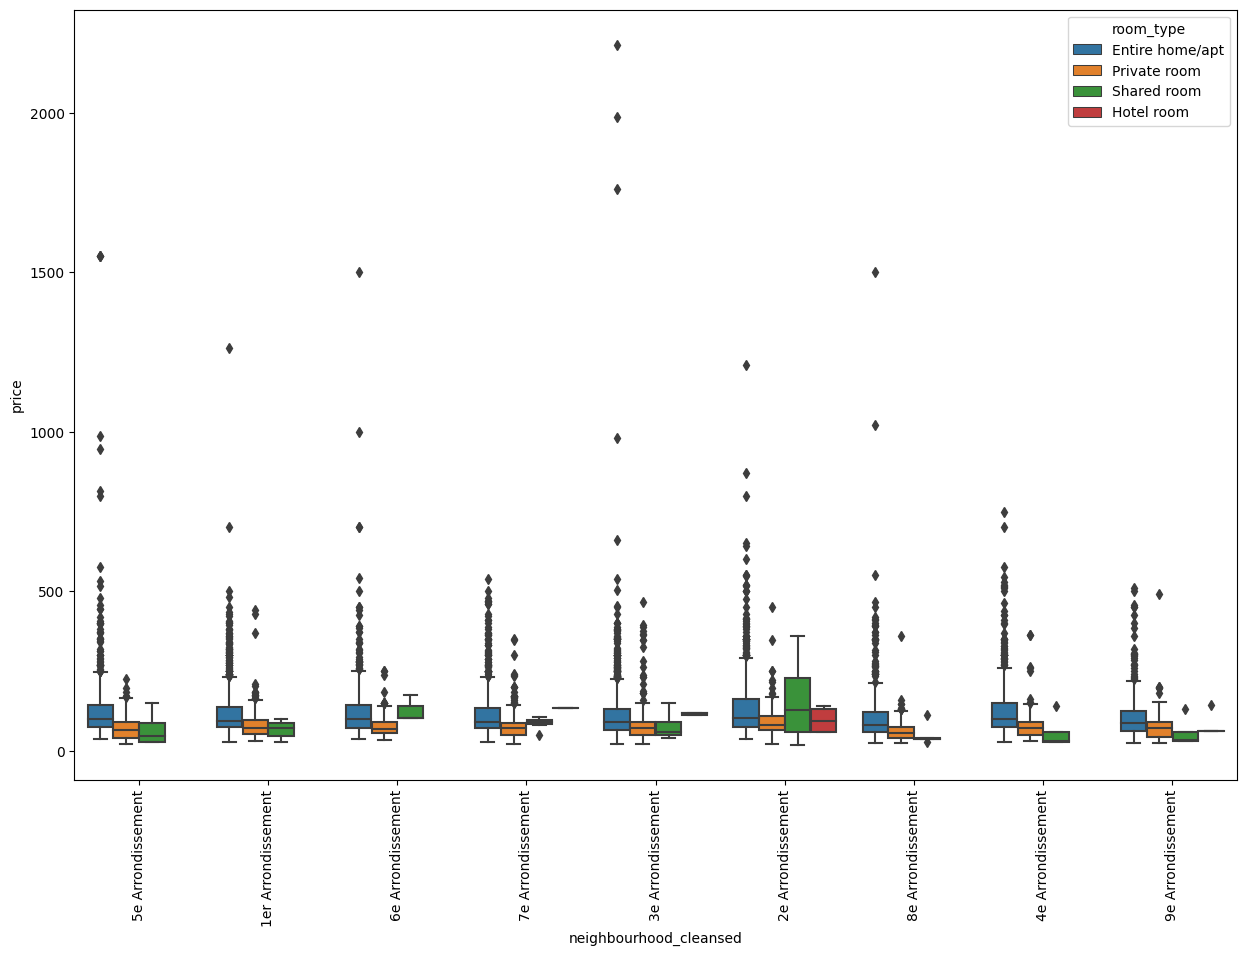

In [47]:
# graphique pour voir les tarifs competitives par quartier et par type rom
plt.figure(figsize=(15, 10))
sns.boxplot(data=df, x='neighbourhood_cleansed', y='price', hue='room_type')
plt.xticks(rotation=90)
plt.show()

In [48]:
#investigat variable host_total_listings_count, hacer distribucion

df['host_total_listings_count'].describe()


count    9465.000000
mean       35.475964
std       254.459785
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max      3568.000000
Name: host_total_listings_count, dtype: float64

In [49]:
#compter combien de lignes ont 1591 et 3568 en host_total_listings_count
df[df['host_total_listings_count'].isin([1591, 3568])].shape[0]



56

In [50]:
#borrar los valores que van encima de 1591
df = df[df['host_total_listings_count'] <= 1000]

In [51]:
df['host_total_listings_count'].describe()

count    9403.000000
mean       16.150803
std        52.418030
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max       444.000000
Name: host_total_listings_count, dtype: float64

In [52]:
#guardar como csv en /mnt/c/Users/brend/Downloads/
df.to_csv('/mnt/c/Users/brend/Downloads/listings_detaille_cleaned.csv', index=False)


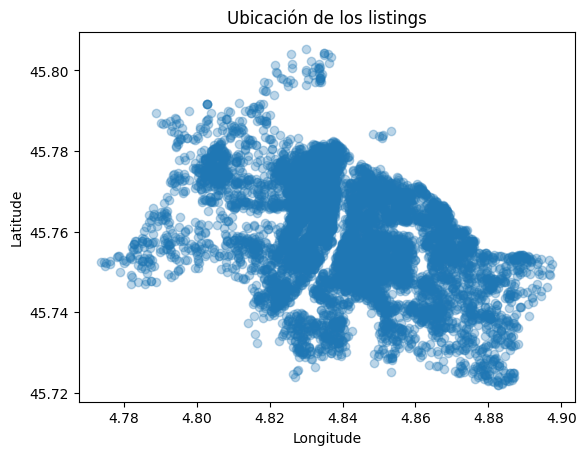

<Figure size 640x480 with 0 Axes>

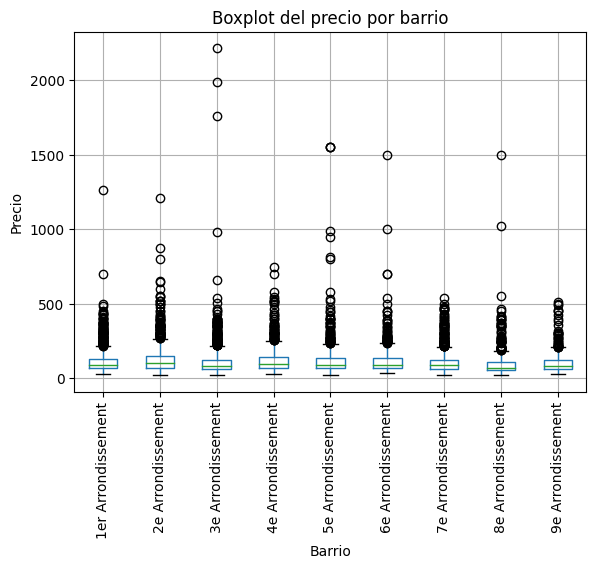

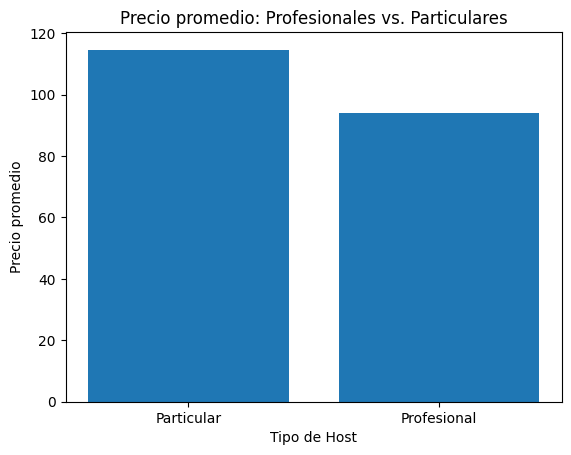

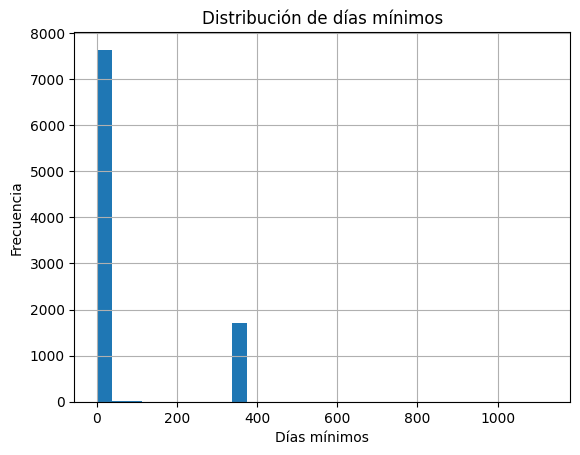

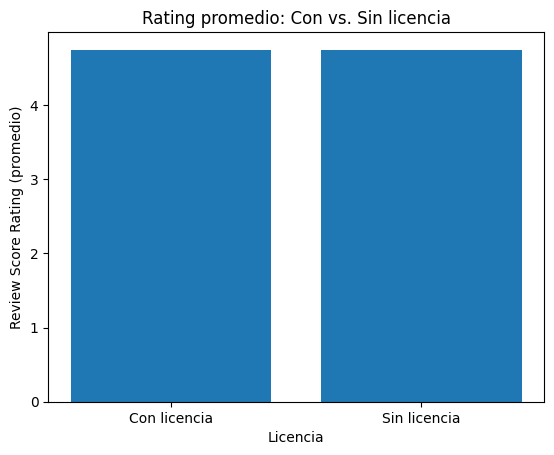

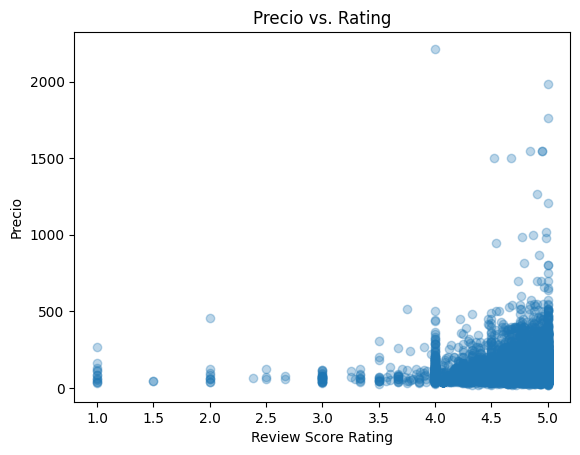

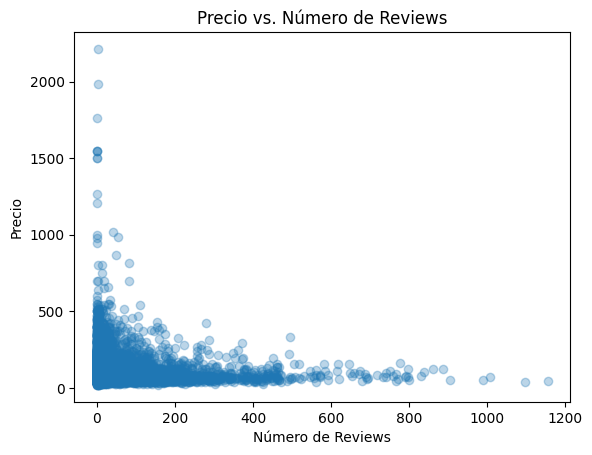

In [53]:
# Cette figure montre la répartition géographique 
# des annonces Airbnb en fonction de leur latitude et longitude.
plt.figure()
plt.scatter(df['longitude'], df['latitude'], alpha=0.3)
plt.title('Ubicación de los listings')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# ========== B) Boxplot precio por barrio/neighbourhood ==========
# Ce graphique en boîte compare les prix des annonces entre différents
#  quartiers pour repérer les variations et les valeurs atypiques.
plt.figure()
# Filtramos barrios con suficiente frecuencia o sólo para ilustración
# Ajusta si "neighbourhood" no existe en tu dataset o si se llama distinto
df.boxplot(column='price', by='neighbourhood_cleansed', rot=90)
plt.title('Boxplot del precio por barrio')
plt.suptitle('')  # Para quitar el título adicional que pone pandas
plt.xlabel('Barrio')
plt.ylabel('Precio')
plt.show()

# ========== C) Comparación de precio promedio (Profesionales vs. Particulares) ==========
# Ce graphique en barres compare le prix moyen des hôtes “professionnels” 
# à celui des hôtes “particuliers”.


df['host_type'] = df['host_total_listings_count'].apply(lambda x: 'Profesional' if x > 20 else 'Particular')

# Calcular el precio promedio por categoría
price_by_host_type = df.groupby('host_type')['price'].mean().reset_index()

plt.figure()
plt.bar(price_by_host_type['host_type'], price_by_host_type['price'])
plt.title('Precio promedio: Profesionales vs. Particulares')
plt.xlabel('Tipo de Host')
plt.ylabel('Precio promedio')
plt.show()

# ========== D) Histograma de minimum_nights ==========
# Ce diagramme en histogramme illustre la fréquence
#  des différentes durées de séjour minimum exigées par les annonces.
plt.figure()
df['minimum_nights'].hist(bins=30)
plt.title('Distribución de días mínimos')
plt.xlabel('Días mínimos')
plt.ylabel('Frecuencia')
plt.show()

# ========== E) Comparación de rating medio con/sin licencia ==========
# Ce graphique en barres compare la note moyenne des annonces
#  disposant d’une licence à celle des annonces sans licence.
df['has_license'] = df['license'].apply(lambda x: 'Con licencia' if x else 'Sin licencia')

rating_by_license = df.groupby('has_license')['review_scores_rating'].mean().reset_index()

plt.figure()
plt.bar(rating_by_license['has_license'], rating_by_license['review_scores_rating'])
plt.title('Rating promedio: Con vs. Sin licencia')
plt.xlabel('Licencia')
plt.ylabel('Review Score Rating (promedio)')
plt.show()

# ========== F) Scatter: price vs. review_scores_rating ==========
# Ce nuage de points montre la relation entre le prix des
#  annonces et leur évaluation moyenne (review_scores_rating).
plt.figure()
plt.scatter(df['review_scores_rating'], df['price'], alpha=0.3)
plt.title('Precio vs. Rating')
plt.xlabel('Review Score Rating')
plt.ylabel('Precio')
plt.show()

# ========== G) Scatter: price vs. number_of_reviews ==========
#Ce nuage de points met en évidence la corrélation éventuelle
#  entre le prix et le nombre de commentaires reçus par chaque annonce.
plt.figure()
plt.scatter(df['number_of_reviews'], df['price'], alpha=0.3)
plt.title('Precio vs. Número de Reviews')
plt.xlabel('Número de Reviews')
plt.ylabel('Precio')
plt.show()

In [54]:
#inspeccionar columna first_review
df['first_review'].head()

0    2010-11-15
1    2011-03-05
2    2011-07-02
3    2011-08-16
4    2012-07-22
Name: first_review, dtype: object

In [55]:
#cuantos nan tineen first_review
df['first_review'].isnull().sum()/df.shape[0]*100

15.197277464638944

In [57]:
#ver total listings
df['host_total_listings_count'].describe()

count    9403.000000
mean       16.150803
std        52.418030
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max       444.000000
Name: host_total_listings_count, dtype: float64